# Azizi Hamza

# Projet Data Augmentation                                                                

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# 1. Image 10 Transformation Techniques

### A ) Random Rotating

In [269]:
def random_rotation(im):
    #------------------#
    im=np.asarray(im)
    shape=im.shape
    teta=np.random.uniform(0,2*np.pi)
    matrice_rot=np.array([[np.cos(teta),-np.sin(teta)],[np.sin(teta),np.cos(teta)]],dtype='float')
    #New_shape_resultat
    n_height= int(abs(shape[0]*np.cos(teta))+abs(shape[1]*np.sin(teta)))+1
    n_width = int(abs(shape[1]*np.cos(teta))+abs(shape[0]*np.sin(teta)))+1
    resultat=np.zeros((n_height,n_width, 3),dtype='uint8')
   #Centres_image_Original
    org_c_height = int(((shape[0]+1)/2)-1)  
    org_c_width = int(((shape[1]+1)/2)-1)  
   #Centres_image_Nouveau
    n_c_height= int(((n_height+1)/2)-1) 
    n_c_width= int(((n_width+1)/2)-1) 

    for i in range(shape[0]):
        for j in range(shape[1]):
            vect=np.array([shape[0]-i-org_c_height,shape[1]-j-org_c_width])
            nv=np.dot(matrice_rot,vect)
            resultat[n_c_height-1-int(nv[0]),n_c_width-1-int(nv[1])]=im[i,j]
    plt.imsave("rotation.jpg",resultat)
    plt.imshow(resultat)

### B ) Vertical Flipping

In [3]:
def flip_vertical(im):
    im=np.asarray(im)
    res=np.flip(im,axis=0)
    plt.imsave("flipped_vertic.jpg",res)

### C ) Horizontal Flipping

In [270]:
def flip_horizontal(im):
    im=np.asarray(im)
    res=np.flip(im,axis=1)
    plt.imsave("flipped_horiz.jpg",res)

### D ) Translation Along X

In [271]:
def translation_x(im,n):                      #im : Fichier Image //// n : nombre d'image à générer
    im=np.asarray(im)
    shape=np.shape(im)
    for i in range(n):
        x=np.random.randint(-shape[1],shape[1])
        if x>=0:
            a=im[:shape[0],:shape[1]-x]
            b=np.zeros([shape[0],x,3],dtype=np.uint8)
            res=np.concatenate((b,a),axis=1)
            plt.imsave(str(i+1)+"x_translation.jpg",res)
        else:
            a=im[:shape[0],abs(x):shape[1]]
            b=np.zeros([shape[0],abs(x),3],dtype=np.uint8)
            res=np.concatenate((a,b),axis=1)
            plt.imsave(str(i+1)+"x_translation.jpg",res)

### E ) Translation Along Y

In [272]:
def translation_y(im,n):
    im=np.asarray(im)
    shape=np.shape(im)
    for i in range(n):
        x=np.random.randint(-shape[0],shape[0])
        if x>=0:
            a=im[x:shape[0],:shape[1]]
            b=np.zeros([x,shape[1],3],dtype=np.uint8)
            res=np.concatenate((a,b),axis=0)
            plt.imsave(str(i+1)+"y_translation.jpg",res)
        else:
            a=im[:shape[0]-abs(x),:shape[1]]
            b=np.zeros([abs(x),shape[1],3],dtype=np.uint8)
            res=np.concatenate((b,a),axis=0)
            plt.imsave(str(i+1)+"y_translation.jpg",res)

### F ) Random Cropping 

In [9]:
def random_cropping(n,im):
    im=np.asarray(im)
    shape=np.shape(im)
    for i in range(n):
        n = np.empty(shape,dtype='u1')
        x_ligne=np.random.randint(0,shape[0]+1)
        y_ligne=np.random.randint(x_ligne+1,shape[0]+1)
        x_colonne=np.random.randint(0,shape[1]+1)
        y_colonne=np.random.randint(x_colonne+1,shape[1]+1)
        n=im[x_ligne:y_ligne,x_colonne:y_colonne]
        plt.imsave(str(i)+"_crop.jpg",n)

### G ) Zooming

In [14]:
def zoom(im):
    im=np.asarray(im)
    x=2
    y=2                                                                                                     
    shape=im.shape
    resultat=np.zeros((shape[0],shape[1], 3),dtype='uint8')                                                                                                                                               
    matrice=np.array([[x,0],[0,y]])
    centre_height = int(((im1.shape[0]+1)/2)-1)  
    centre_width = int(((im1.shape[1]+1)/2)-1)
    for i in range(shape[0]):
        for j in range(shape[1]): 
            vect=np.array([i,j])
            nv=np.dot(matrice,vect)
            if ( 0<nv[0]<shape[0] and 0 < nv[1]<shape[1]):
                resultat[int(nv[0]),int(nv[1])]=im[i,j]
    plt.imsave("zoomed.jpg",resultat)
    plt.imshow(resultat)

### H ) Color Modification

In [12]:
def color_modification(im):
    im=np.asarray(im)
    a=np.random.randint(1,6)
    b=np.random.randint(1,5)
    res=a*im + b
    plt.imsave("modif_color.jpg",res)

### I ) Adding Light Gaussian Noise

In [13]:
def add_gauss_noise(im):
    im=np.asarray(im)
    gauss_noise=np.zeros((im.shape[0],im.shape[1],im.shape[2]),dtype='uint8')
    normal=np.random.normal(0,10, (im.shape[0],im.shape[1]))
    gauss_noise[:,:,0]=im[:,:,0]+normal
    gauss_noise[:,:,1]=im[:,:,1]+normal
    gauss_noise[:,:,2]=im[:,:,2]+normal
    plt.imsave("add_gauss_noise.jpg",gauss_noise)
    plt.imshow(gauss_noise)

### J ) Adding Illumination

In [273]:
def adding_illumination(im):
    im=np.asarray(im)
    res=np.copy(im)
    shape=im.shape
    for k in range(shape[2]):
        for i in range(shape[0]):
            for j in range(shape[1]):
                if (res[i,j,k] < 215):
                    res[i,j,k]=res[i,j,k]+40
    plt.imsave("add_illumin.jpg",res)

# 2. Visualization Of Some Images After Transformations

In [25]:
translation_10 = np.array(Image.open('1translation_y_10.jpg'))
colored_tree10 = np.array(Image.open('color_modif_10.jpg'))
Tree6 = np.array(Image.open('Tree_6.jpg'))
gauss_tree10 = np.array(Image.open('gauss_noise_10.jpg'))
Tree10 = np.array(Image.open('Tree_10.jpg'))
gauss_tree6 = np.array(Image.open('gauss_noise_6.jpg'))
rotation_tree6 = np.array(Image.open('random_rotation_6.jpg'))
add_illu_tree6 = np.array(Image.open('add_illu_6.jpg'))
rot_Dog_10 = np.array(Image.open('rotation_10.jpg'))
colored_dog10 = np.array(Image.open('modif_color_10.jpg'))
add_illu_dog10 = np.array(Image.open('add_illumin_10.jpg'))
Dog_10 = np.array(Image.open('Dog_10.jpg'))

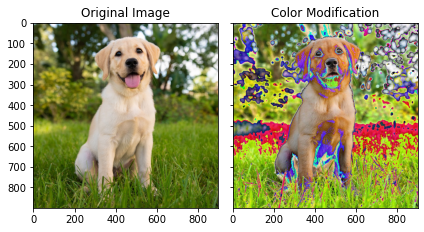

In [33]:
fig, axs = plt.subplots(1,2, sharey=True, tight_layout=True)
axs[0].imshow(Dog_10)
axs[0].set_title('Original Image');
axs[1].imshow(colored_dog10)
axs[1].set_title('Color Modification');

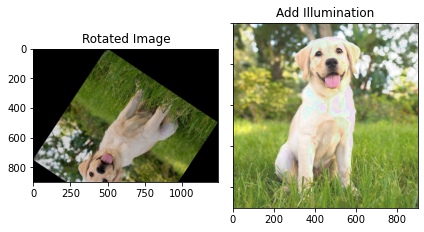

In [274]:
fig2, axs2 = plt.subplots(1,2, sharey=True, tight_layout=True)
axs2[0].imshow(rot_Dog_10)
axs2[0].set_title('Rotated Image');
axs2[1].imshow(add_illu_dog10)
axs2[1].set_title('Add Illumination');

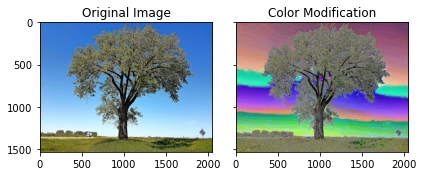

In [39]:
fig3, axs3 = plt.subplots(1,2, sharey=True, tight_layout=True)
axs3[0].imshow(Tree10)
axs3[0].set_title('Original Image');
axs3[1].imshow(colored_tree10)
axs3[1].set_title('Color Modification');

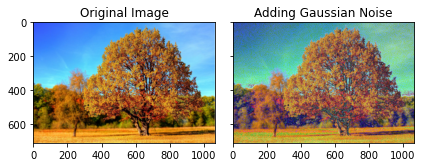

In [41]:
fig4, axs4 = plt.subplots(1,2, sharey=True, tight_layout=True)
axs4[0].imshow(Tree6)
axs4[0].set_title('Original Image');
axs4[1].imshow(gauss_tree6)
axs4[1].set_title('Adding Gaussian Noise');

# 3. Visualization Of The Histograms Of Original And Some Resulting Images


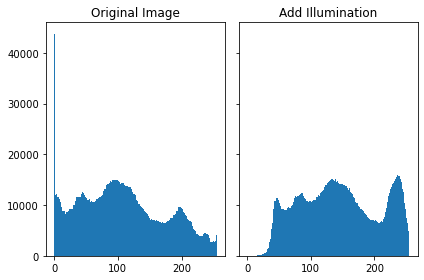

In [44]:
fig, axs = plt.subplots(1,2, sharey=True, tight_layout=True)

hist1=axs[0].hist(Dog_10.flatten(), bins=range(256))
axs[0].set_title('Original Image');
hist2=axs[1].hist(add_illu_dog10.flatten(), bins=range(256))
axs[1].set_title('Add Illumination');

### Les pixels de l'image trop claire se concentrent dans la partie droite de l'histogramme 

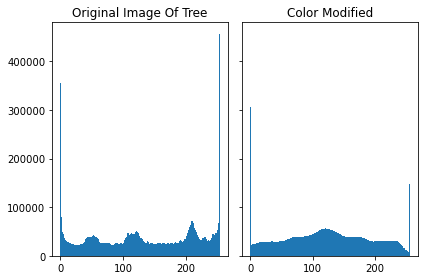

In [50]:
fig, axs = plt.subplots(1,2, sharey=True, tight_layout=True)
hist3=axs[0].hist(Tree10.flatten(), bins=range(256))
axs[0].set_title('Original Image Of Tree');
hist4=axs[1].hist(colored_tree10.flatten(), bins=range(256))
axs[1].set_title('Color Modified');

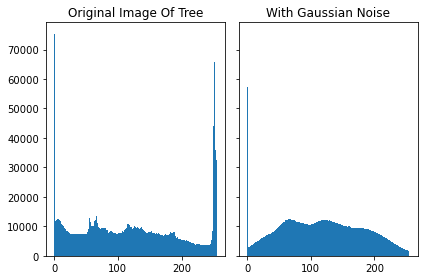

In [51]:
fig, axs = plt.subplots(1,2, sharey=True, tight_layout=True)
hist5=axs[0].hist(Tree6.flatten(), bins=range(256))
axs[0].set_title('Original Image Of Tree');
hist6=axs[1].hist(gauss_tree6.flatten(), bins=range(256))
axs[1].set_title('With Gaussian Noise');

# 4.  Applying A Binary Classification On The Data

In [240]:
def creating_data_set():
    dataset=[]
    label=[]
    DATADIR="C:/Users/hamza/Downloads/Untitled Folder"
    categories=['Dog','Tree']
    for category in categories:
        path=os.path.join(DATADIR,category)
        class_num=categories.index(category)
        for img in os.listdir(path):
            try:
                im=Image.open(os.path.join(path,img))
                new_image=im.resize((600,600))
                dataset.append(np.array(new_image).reshape(-1))
                label.append(class_num)
            except Exception as e:
                pass
    return dataset,label

In [241]:
X,y=creating_data_set()

In [242]:
X=np.array(X)
y=np.array(y)

In [243]:
X.shape

(110, 1080000)

In [244]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(88, 1080000) (22, 1080000) (88,) (22,)


In [275]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(X_train,y_train)

In [276]:
print('train score: ', model.score(X_train, y_train))
print('test score: ', model.score(X_test, y_test))

train score:  1.0
test score:  0.7727272727272727


In [277]:
print(model.coef_,model.intercept_)

[[-2.26048473e-06 -1.75316569e-06 -6.62906575e-07 ... -1.18772628e-06
  -1.39850656e-06 -3.57209646e-06]] [7.40650164e-09]


In [278]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [279]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print("LA MATRICE DE CONFUSION\n")
print(cm)

LA MATRICE DE CONFUSION

[[10  1]
 [ 4  7]]


In [280]:
y_test

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [281]:
data=[]
im=Image.open("Tree_test.jpg")
new_image=im.resize((600,600))
data.append(np.array(new_image).reshape(-1))
data=np.array(data)

In [282]:
data[0]

array([155, 164, 193, ...,  70,  65,  36], dtype=uint8)

In [283]:
model.predict(data)

array([1])

In [284]:
data2=[]
im=Image.open("chien.jpg")
new_image=im.resize((600,600))
data2.append(np.array(new_image).reshape(-1))
data2=np.array(data2)
model.predict(data2)

array([0])

# Taux De Succès

In [285]:
acc = metrics.accuracy_score(y_test,y_pred)
print(acc) 

0.7727272727272727


# Taux D'erreur


In [286]:
err = 1.0 - acc
print(err) 

0.2272727272727273


# Sensibilité

In [287]:
se = metrics.recall_score(y_test,y_pred)
print(se) 

0.6363636363636364
